In [1]:
import re

import numpy as np

with open("input.txt") as file:
    dots = [tuple(map(int, line.rstrip().split(","))) for line in file if "," in line]
    file.seek(0)
    fold_instructions = [re.search(r"([xy])=(\d+)", line).groups() for line in file if "=" in line]

In [2]:
xs, ys = list(zip(*dots))
sheet = np.zeros((max(ys) + 1, max(xs) + 1), dtype=bool)

for x, y in dots:
    sheet[y][x] = 1

axis_mapping = {"x": 1, "y": 0}

for axis, position in fold_instructions:
    axis = axis_mapping[axis]

    one, _, other = np.split(sheet, [int(position), int(position) + 1], axis=axis)
    other_flipped = np.flip(other, axis=axis)
    other_padded = np.insert(
        other_flipped,
        [0] * (one.shape[axis] - other_flipped.shape[axis]),
        [False],
        axis=axis,
    )
    sheet = one | other_padded


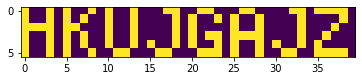

In [3]:
import matplotlib.pyplot as plt
plt.imshow(sheet)